In [1]:
import torch
from torch import nn ## nn stand for nerual network
import matplotlib.pyplot as plt

#Check PyTorch version
torch.__version__

'2.0.1+cu117'

## 1. Data (preparing and loading)

Data can be almost anything ... in machine learning;
* Excel speadsheet
* Image of any kind 
* Videos 
* Audio like songs or podcasts
* DNA
* Text

Machione learning is a game of two parts: 
1. Get data into a numberical representation ---> Convert data into a numerical
2. Build a model to learn patterns in that numerical representation. ---> use the model



### Linear regression Formula.
to showcase this , lets's create some *known* data using the linear regression formula.

we'll use a linear regression formula to make a straight line with known parameters.

In [2]:
# Create *known* parameter s
weight = 0.7 
bias = 0.3

#Create 
start = 0
end = 1
step = 0.02 
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
# Commonly upper case in the machine learning represent a matrix or  a tensor, and lowwer case letter will represent a vector
X[:10] , y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

# split date in to different set
1. Training set
2. Testing set
3. Validation set [Optional]

In [3]:
# Create a train/ test split
train_split_len = int(0.8 * len(X))
X_train, y_train = X[:train_split_len], y[:train_split_len]
X_test, y_test = X[train_split_len:], y[train_split_len:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [4]:
want_eight = 8
test_arr = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
split_one = test_arr[:want_eight]
split_two = test_arr[want_eight:]

split_one, split_two

([0, 1, 2, 3, 4, 5, 6, 7], [8, 9, 10])

In [5]:
def plot_predictions(train_data = X_train, 
                    train_labels = y_train,
                    test_data = X_test,
                    test_labels = y_test,
                    predictions=None):
    plt.figure(figsize=(10, 7))
    #plot training dat in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    #Are there predictions？
    if predictions is not None:
        #plot the predictions if they exist
        plt.scatter(test_data, predictions, c="r", s=4, label ="Predictions")
    plt.legend(prop={"size": 14})

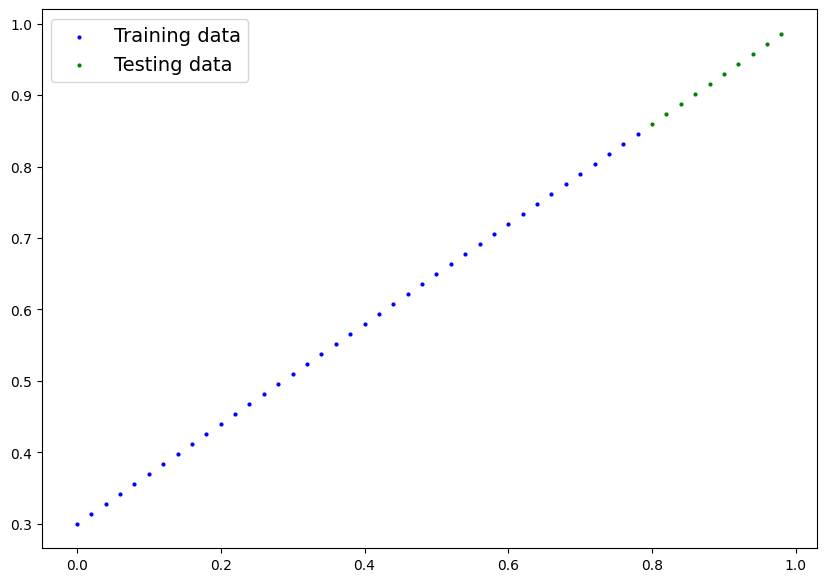

In [6]:
plot_predictions()

In [7]:
##Build model with torch
# Create linear regression model class
class LinearRegressionModel(nn.Module): # <- () means inherhits from nn.Module
    def __init__ (self):
        super().__init__()

        # Initialize model parameters ( HINT: these could be different layers from torch.nn, single parameters, hard-coded values or functions ) 
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))  # <-- requires_grad = True mean pytorch will track the gradients of this specific parameter for use with torch.autograd
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    #Forward method to define the computiation in the model [ this method require to be overwrite, and it defines what happens in the forward computiation ]
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the    [Forward defines the computation performed at every call.]
        return self.weights * x + self.bias # this is the linear regression 

## what our model does: 
Start with random values (weight $ bias)
Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)
How does it do so ? 
2 Main AlgorithmsL 
1. Gradient descent
2. Backpropagation

----------
Now we careate a model, see what's inside... 

So we can check our model parameters or what;s insde our model using `.parameters().`

In [8]:
# Create a random seed 
torch.manual_seed(42)

#create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [9]:
# the target is to make random seed parampter to [grow] to be the orginal weight and bias
weight, bias

(0.7, 0.3)

In [10]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making prediction using `torch.inference_mode()`
To Check our model's predictive power, let's see how well it predicts `y_test` base on `X_test`

When we Pass the data throught our model it's going to run it through the `forward()` method

In [11]:
# to direct do the predict without any training?
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds, y_test

(tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

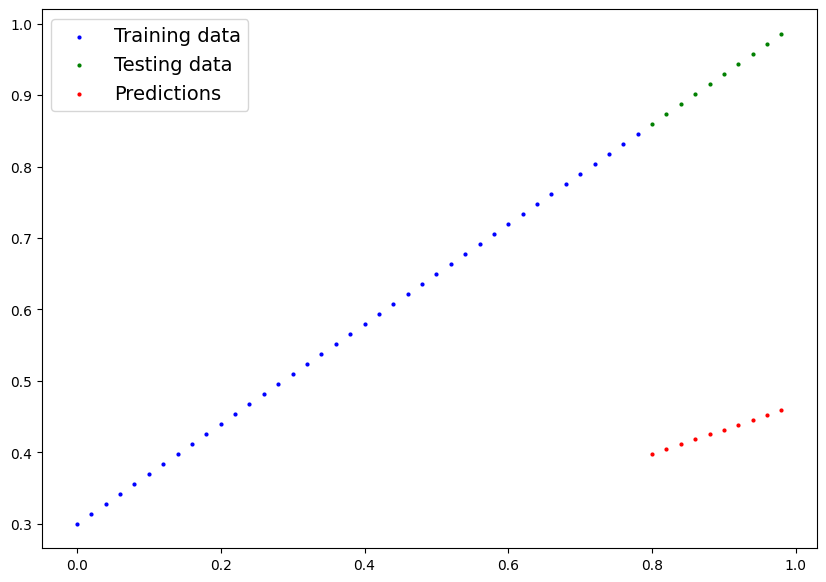

In [12]:
# To visuslize this res for now
plot_predictions(predictions=y_preds)


## Train model
the whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *known* parameters.

or in other words from a poor representation of the data

 - One way to measure how poor or how wrong your models prodiction are is to use a loss function.

 - * Note: loss function may also be called cost function or criterion in different areas. For our case, We're going to refer to it as losss function.
  
Things we need to train: 
* **Loss function:** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better [https://pytorch.org/docs/stable/nn.html#loss-functions] -- for vary functions for different purpose
* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (e.g. weight & bias) to improve the loss function.

  And specifically for PyTorch, we need:
  - a training loop
  - a test loop

In [13]:
# chosse and set uo a loss function
loss_fn = nn.L1Loss()

#setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(), lr = 0.0001) # lr stand for --> learning Rate.


### Build up the training loop  --> [Also a testing loop] in pyTorch
A couple of things we need in a training loop: 
0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward()` functions) to make predictions on data - also called forward propagation
2. Calculate the loss (Compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the newwork to calculate the gradients of each of the parameters of our model with respect to the loss
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)



In [14]:
# An epoch is one loop through the data ... (this is a hyperparameter because we've set it ourselves)

epochs = 20000

#track different values 
epoch_count = [] 
train_loss_values = []
test_loss_values = []

for epoch in range(epochs):
    
    #set the model to training mode
    model_0.train() # train mode in pytorch sets all parameters that require gradients to require gradient

    #1. Forward pass
    y_pred = model_0(X_train)  # The current pred res base on the current [params]
    
    #2. Calculate the loss
    loss = loss_fn(y_pred, y_train) # use loss function to get how wrong the res is?
    #3. Optimizer zero grad [zero the optimizer gradients] --> they accumulate every epoch, zero them to start fresh each forward pass
    optimizer.zero_grad() # 

    #4. perform backpropagation on the loss with respect to the parameters of the model
    loss.backward() # [ Compute the gradient of every parameter with requires_grad = True ]

    #5. Step the optimizer (perform gradient descent)
    optimizer.step()  # take the step here ? 
    model_0.eval() 
    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")
    # model_0.eval() # turns off gradient tracking

Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.4944015145301819 
Epoch: 10 | MAE Train Loss: 0.31172919273376465 | MAE Test Loss: 0.49305421113967896 
Epoch: 20 | MAE Train Loss: 0.31057703495025635 | MAE Test Loss: 0.4917070269584656 
Epoch: 30 | MAE Train Loss: 0.30942484736442566 | MAE Test Loss: 0.4903597831726074 
Epoch: 40 | MAE Train Loss: 0.30827268958091736 | MAE Test Loss: 0.48901262879371643 
Epoch: 50 | MAE Train Loss: 0.30712056159973145 | MAE Test Loss: 0.4876653552055359 
Epoch: 60 | MAE Train Loss: 0.30596840381622314 | MAE Test Loss: 0.4863181710243225 
Epoch: 70 | MAE Train Loss: 0.30481624603271484 | MAE Test Loss: 0.48497089743614197 
Epoch: 80 | MAE Train Loss: 0.30366405844688416 | MAE Test Loss: 0.483623743057251 
Epoch: 90 | MAE Train Loss: 0.30251190066337585 | MAE Test Loss: 0.4822765290737152 
Epoch: 100 | MAE Train Loss: 0.30135971307754517 | MAE Test Loss: 0.4809292256832123 
Epoch: 110 | MAE Train Loss: 0.30020755529403687 | MAE Test Los

In [15]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.6999], requires_grad=True),
 Parameter containing:
 tensor([0.3000], requires_grad=True)]

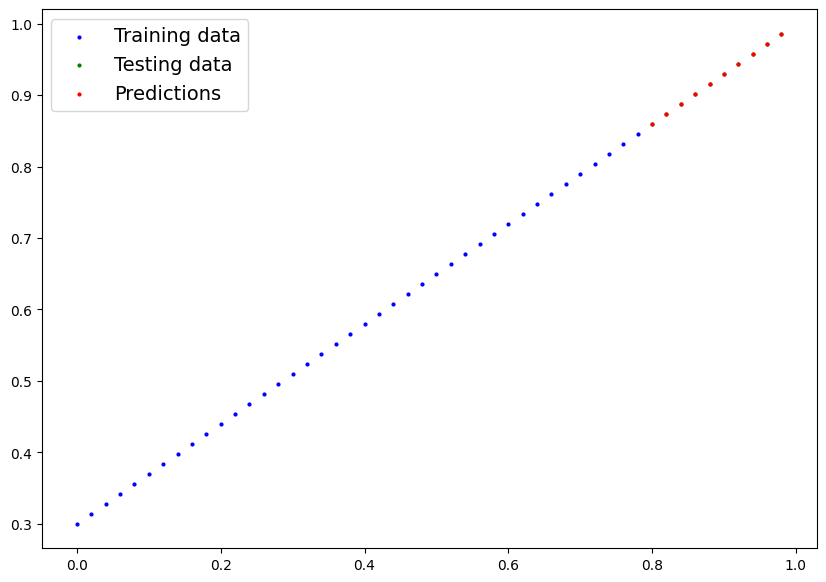

In [16]:
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds, y_test

# To visuslize this res for now
plot_predictions(predictions=y_preds)


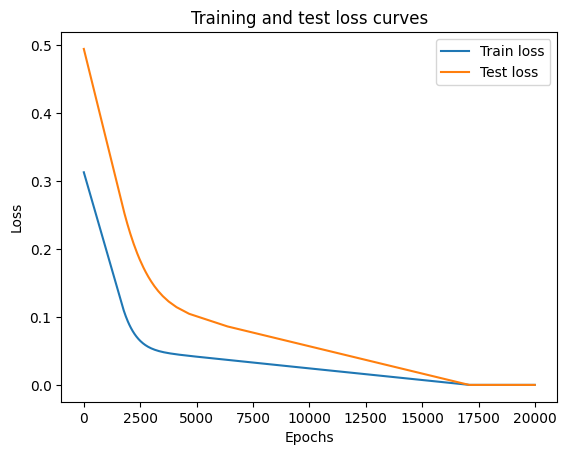

In [17]:
# Create empty lists to keep track of model progress

# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

## Saving a model in pyTorch

There are three main methods you should about for saving and loading models in Pytorch.
1. `torch.save()` - allows you save a Pytorch object in Python's pickle format 
2. `torch.load()` - allow you load a saved PyTorch object 
3. `torch.nn.Module.load_state_dict()` this allows to laod a model's saved state dictionary

In [18]:
# code to save the model we have 
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2. Create model save path 
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

## To save the model in the file 
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)


# load our model back into the code 
|[ Since we saved our model's `state_dict()` rather the entire model, we'll create a new instance of our model class and load the saved `state_dict()` into that]

In [20]:
# to load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [21]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6999])), ('bias', tensor([0.3000]))])

In [22]:
torch.cuda.is_available()

True